<div class="alert alert-block alert-success">
    
# FIT5196 Assessment 2
#### Student Name: Rohan Singh
#### Student ID: 31339646


Environment: Python 


    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Patent Files](#examine) <br>
[4. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[4.1. Defining Regular Expressions](#Reg_Exp) <br>
$\;\;\;\;$[4.2. Reading Files](#Read) <br>
$\;\;\;\;$[4.3. Whatever else](#latin) <br>
[5. Writing to CSV/JSON File](#write) <br>
$\;\;\;\;$[5.1. Verification - using the sample files](#test_xml) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

-------------------------------------

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from ast import literal_eval as make_tuple
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

-------------------------------------

<div class="alert alert-block alert-warning">

## 3.  Reading the data <a class="anchor" name="examine"></a>

 </div>

The only permitted packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** ...

In [2]:
df = pd.read_csv("31339646_dirty_data.csv")

In [3]:
df_warehouse = pd.read_csv("warehouses.csv")

In [4]:
df_missing = pd.read_csv("31339646_missing_data.csv")

In [5]:
df0 = pd.read_csv("31339646_outlier_data.csv")

Calling the models

In [6]:
lm_s = LinearRegression()
lm_w = LinearRegression()
lm_a = LinearRegression()
lm_sp = LinearRegression()

-------------------------------------

<div class="alert alert-block alert-warning">

## 3.  EDA <a class="anchor" name="examine"></a>

 </div>

First of all, ....

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   delivery_discount              500 non-null    int64  
 10  season                         500 non-null    object 
 11  is_expedited_delivery          500 non-null    bool   
 12  distance_to_nearest_warehouse  500 non-null    flo

Having examined the file content, the following observations were made:



In [8]:
df.describe()

,order_price,delivery_charges,customer_lat,customer_long,delivery_discount,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13715.680000,57.327168,-35.984386,143.138060,25.500000,1.067340
std,7775.959686,18.723602,18.206128,18.204662,20.138548,0.479769
min,580.000000,23.759000,-37.828542,-37.824733,0.000000,0.050410
25%,7645.000000,41.483500,-37.818225,144.949753,0.000000,0.720570
50%,12487.500000,55.208000,-37.812493,144.963076,25.000000,1.033495
75%,19171.250000,69.334750,-37.806369,144.981734,50.000000,1.377420
max,37105.000000,109.981000,145.005764,145.019431,50.000000,2.828780


In [9]:
df['fixed'] = 0

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 4.  Dirty data <a class="anchor" name="load"></a>

</div>

In this section, we will look at and clean the dirty data coluumns

<div class="alert alert-block alert-info">
    
### 4.1. Fixing the Seasons spellings <a class="anchor" name="Reg_Exp"></a>

Defining correct regular expressions is crucial in extracting desired information from the text efficiently. ...

In [10]:
df['season'].unique()

array(['Summer', 'Winter', 'Spring', 'Autumn', 'winter', 'spring',
       'autumn', 'summer'], dtype=object)

In [11]:
for ix,y2 in enumerate(df['season']):
    if y2 == 'winter':
        df['season'][ix] = 'Winter'
        df['fixed'][ix] = 1
    elif y2 == 'spring':
        df['season'][ix] = 'Spring'
        df['fixed'][ix] = 1
    elif y2 == 'summer':
        df['season'][ix] = 'Summer'
        df['fixed'][ix] = 1
    elif y2 == 'autumn':
        df['season'][ix] = 'Autumn'
        df['fixed'][ix] = 1



<ipython-input-11-8eba58f47ee4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'][ix] = 'Winter'
<ipython-input-11-8eba58f47ee4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][ix] = 1
<ipython-input-11-8eba58f47ee4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'][ix] = 'Spring'
<ipython-input-11-8eba58f47ee4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

This code iterates through each element in the 'season' column of 'df', using the built-in 'enumerate' function to get the index of the current element.

For each element in the 'season' column, the code checks if it matches any of the four seasons: 'winter', 'spring', 'summer', or 'autumn'. If the element matches one of these seasons, the code converts the first letter to uppercase and assigns it back to the 'season' column for that index. Additionally, the 'fixed' column for that index is set to 1.

This code is used to standardize the capitalization of the season names and create a binary column 'fixed' indicating whether a given row has been updated.

In [12]:
df['season'].unique()

array(['Summer', 'Winter', 'Spring', 'Autumn'], dtype=object)

<div class="alert alert-block alert-info">
    
### 4.2. Fixing the nearest warehouse <a class="anchor" name="Read"></a>

In this step, we will fix the nearest warehouse

In [13]:
df['nearest_warehouse'].unique()

array(['Nickolson', 'bakers', 'Bakers', 'Thompson', 'nickolson',
       'thompson'], dtype=object)

In [14]:
for ixx,y22 in enumerate(df['nearest_warehouse']):
    if y22 == 'bakers':
        df['nearest_warehouse'][ixx] = 'Bakers'  #checking the spellings
        df['fixed'][ix] = 1
    elif y22 == 'nickolson':
        df['nearest_warehouse'][ixx] = 'Nickolson'
        df['fixed'][ix] = 1
    elif y22 == 'thompson':
        df['nearest_warehouse'][ixx] = 'Thompson'
        df['fixed'][ix] = 1

<ipython-input-14-ce5136c19c7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nearest_warehouse'][ixx] = 'Bakers'  #checking the spellings
<ipython-input-14-ce5136c19c7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][ix] = 1
<ipython-input-14-ce5136c19c7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nearest_warehouse'][ixx] = 'Nickolson'
<ipython-input-14-ce5136c19c7c>:7: SettingWithCopyWarning: 
A value 

This code iterates through each element in the nearest_warehouse column of a pandas DataFrame df, using the built-in 'enumerate' function to get the index of the current element.For each element in the 'nearest_warehouse' column, the code checks if it matches any of the three warehouse locations: 'bakers', 'nickolson', or 'thompson'. If the element matches one of these warehouse locations, the code capitalizes the first letter and assigns it back to the 'nearest_warehouse' column for that index. Additionally, the 'fixed' column for the first index is set to 1. This code is  used to standardize the capitalization of the warehouse names and create a binary column 'fixed' indicating whether a given row has been updated. 

In [15]:
df['nearest_warehouse'].unique()

array(['Nickolson', 'Bakers', 'Thompson'], dtype=object)

-------------------------------------

Fixing the longitude and latitude

In [16]:
df[['customer_lat','customer_long']] = df[['customer_long','customer_lat']].where(df['customer_lat'] > 0,df[['customer_lat','customer_long']].values )

<div class="alert alert-block alert-info">
    
### 4.3. Checking the warehouse <a class="anchor" name="latin"></a>

The function converts the latitude and longitude values from degrees to radians using the 'map' function and the 'radians' function from the math module.
Next, the function calculates the difference in longitude and latitude between the two points.
The function then uses the Haversine formula to calculate the distance between the two points on the Earth's surface, in kilometers. This formula calculates the great-circle distance between two points on a sphere, such as the Earth, using the law of haversines.
Finally, the function returns the distance between the two points in kilometers.

In [17]:
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6378 * c
    return km

This code defines a function called 'near' that takes two arguments: the latitude and longitude of a location. The result of the apply method is a Series of distances between the input location and each warehouse location. The idxmin method is then called on this Series to find the index of the minimum distance, which corresponds to the nearest warehouse to the input location. Finally, the function returns the name of the nearest warehouse.



In [18]:
def near(lat, long):
    dis = df_warehouse.apply(lambda row: dist(lat, long, row['lat'], row['lon']),axis = 1)
    return df_warehouse.loc[dis.idxmin(), 'names']

In [19]:
df['test'] = df.apply(lambda row: near(row['customer_lat'], row['customer_long']),axis=1)

In [20]:
wrong_warehouse = []
for r12 in range(len(df)):
    if df['nearest_warehouse'][r12] != df['test'][r12]:
        wrong_warehouse.append(r12)

In [21]:
for r13 in wrong_warehouse:
    df['nearest_warehouse'][r13] = df['test'][r13]
    df['fixed'][r13] = 1

<ipython-input-21-6bc62e97670d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nearest_warehouse'][r13] = df['test'][r13]
<ipython-input-21-6bc62e97670d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][r13] = 1


Fixing the nearest distance

In [22]:
df2 = df
df2['names'] = df2['test']
df2 = pd.merge(df2, df_warehouse,on='names', how='left') #joining the data using the merge function with a left join on the column names

This is a Python function that calculates the great-circle distance between two points on the Earth's surface, given their longitudes and latitudes. The formula used to compute this distance is called the Haversine formula. The first line of the function uses the map function to convert the four input arguments from degrees to radians, using the radians function from the math module. This is because the Haversine formula uses trigonometric functions that expect their arguments to be in radians. The function returns the distance between the two points, in kilometers.

In [23]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians,[lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2- lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6378 * c
    return km

Applying the function to every row in the dataframe and creating a column called test_distance

In [24]:
df2['test_distance'] = [haversine(df2.customer_long[i],df2.customer_lat[i],df2.lon[i],df2.lat[i]) for i in range(len(df2))]
df2['test_distance'] = df2['test_distance'].round(decimals=5) #rounding to 5 decimals

writing the index values of the rows where the values of distance_to_nearest_warehouse is not equal to the test_distance into a list.

In [25]:
wrong_distance = [] #iinitiating new list
for r15 in range(len(df)):
    if df['distance_to_nearest_warehouse'][r15].round(decimals=5) != df2['test_distance'][r15]:
        wrong_distance.append(r15)

corrected the wrong values 

In [26]:
for f11 in wrong_distance:
    df['distance_to_nearest_warehouse'][f11] = df2['test_distance'][f11]
    df['fixed'][f11] = 1

<ipython-input-26-adac7e69dee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_nearest_warehouse'][f11] = df2['test_distance'][f11]
<ipython-input-26-adac7e69dee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][f11] = 1


Fixing the is customer happy

In [27]:
sid = SentimentIntensityAnalyzer() # intializing the SentimentIntensityAnalyzer function from nltk library
df['test_analysis'] = False # intializing the value of test analysis column to false

Taking in the value of the compound polarity score and giving it the value of true if its over 0.05 or else making it false for every row

In [28]:
score = [] #iinitiating new list
for idc,x in enumerate(df['latest_customer_review']):
    if sid.polarity_scores(str(x))['compound'] >= 0.05:  #
        df['test_analysis'][idc] = True
    else:
        df['test_analysis'][idc] = False

<ipython-input-28-669a4c390030>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test_analysis'][idc] = True
<ipython-input-28-669a4c390030>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test_analysis'][idc] = False


For each row we checks if the values in the columns is_happy_customer and test_analysis are not the same. If they are not the same we check if the value of is_happy_customer is True or False. If it is True, then it changes the value to False and sets the value of 'fixed' column to 1. If it is False, it changes the value to True and sets the value of fixed column to 1. This code fixs data errors in the is_happy_customer column.

In [29]:
for j111 in range(len(df)):
    if df['is_happy_customer'][j111] != df['test_analysis'][j111]:
        if df['is_happy_customer'][j111] == True:
            df['is_happy_customer'][j111] = False
            df['fixed'][j111] = 1
        elif df['is_happy_customer'][j111] == False:
            df['is_happy_customer'][j111] = True
            df['fixed'][j111] = 1

<ipython-input-29-15938398418f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_happy_customer'][j111] = False
<ipython-input-29-15938398418f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][j111] = 1
<ipython-input-29-15938398418f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_happy_customer'][j111] = True
<ipython-input-29-15938398418f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [30]:
for j111 in range(len(df)):
    if df['is_happy_customer'][j111] != df['test_analysis'][j111]:
        print(yes) #checkinh all the errors have been resolved

In [31]:
for index,row in df.iterrows():
    if row['customer_lat'] > 0:
        df['fixed'][index] = 1

We check if the values in the customer_lat column are greater than zero. If the values in the customer_lat column are greater than zero, then the values of the two columns are swapped using the where method. If the values in the customer_lat column are not greater than zero then the original values of the two columns are used. This is used as the only errors in these columns appear to be that the longtitude and latitude are swaped.

Fixing shopping cart

Here we create a matrix by choosing columns that only have two items in the shopping cart, we create a single row of each product here according to it quantity, we use the first 15 columns to create the matrix so we have 30 rows in this matrix

In [32]:
main = [] #iinitiating new list
ind = [] #iinitiating new list
for y in range(30):
    li = []
    df['shopping_cart'][y]
    x = make_tuple(df['shopping_cart'][y])
    if len(x) == 2:
        ind.append(y)
        for x1 in x:
            if x1[0] == 'Thunder line':
                x10 = x1[1]
            else:
                x10 = 0
            if x1[0] == 'Candle Inferno':
                x11 = x1[1]
            else:
                x11 = 0
            if x1[0] == 'iAssist Line':
                x12 = x1[1]
            else:
                x12 = 0
            if x1[0] == 'pearTV':
                x13 = x1[1]
            else:
                x13 = 0
            if x1[0] == 'Universe Note':
                x14 = x1[1]
            else:
                x14 = 0
            if x1[0] == 'Alcon 10':
                x15 = x1[1]
            else:
                x15 = 0
            if x1[0] == 'Olivia x460':
                x16 = x1[1]
            else:
                x16 = 0
            if x1[0] == 'Lucent 330S':
                x17 = x1[1]
            else:
                x17 = 0
            if x1[0] == 'iStream':
                x18 = x1[1]
            else:
                x18 = 0
            if x1[0] == 'Toshika 750':
                x19 = x1[1]
            else:
                x19 = 0
            li = [x10,x11,x12,x13,x14,x15,x16,x17,x18,x19]
            main.append(li)
            

We now add each of thsee rows to create a complete matrix of 

In [33]:
main2 = [] #iinitiating new list
for u in range(0,len(main),2):
    li1 = []
    v1 = main[u][0] + main[u+1][0]
    v2 = main[u][1] + main[u+1][1]
    v3 = main[u][2] + main[u+1][2]
    v4 = main[u][3] + main[u+1][3]
    v5 = main[u][4] + main[u+1][4]
    v6 = main[u][5] + main[u+1][5]
    v7 = main[u][6] + main[u+1][6]
    v8 = main[u][7] + main[u+1][7]
    v9 = main[u][8] + main[u+1][8]
    v10 = main[u][9] + main[u+1][9]
    li = [v1,v2,v3,v4,v5,v6,v7,v8,v9,v10]
    main2.append(li)

In [34]:
pri = [] #iinitiating new list
for o in ind:
    pri.append(df['order_price'][o])

In [35]:
x = np.linalg.solve(main2[0:10],pri[0:10])

We now create a dict with the names of the products as keys and its values as the value. 

In [36]:
dic = {'Thunder line':x[0],'Candle Inferno':x[1],'iAssist Line':x[2],'pearTV':x[3],'Universe Note':x[4],'Alcon 10':x[5],'Olivia x460':x[6],'Lucent 330S':x[7],'iStream':x[8],'Toshika 750':x[9]}

In [37]:
h1 = [] #iinitiating new list
for id,p in enumerate(df['shopping_cart']):
    h2 = []
    h = make_tuple(p)
    h2 = [h,df['order_price'][id]]
    h1.append(h2)

here we check if the order price is correct by adding up the product value witht the product quantity of each tuples we have created. 

In [38]:
error = [] #iinitiating new list
for idd,j in enumerate(h1):
    n10 = 0
    for j1 in j[0]:
        n10= n10 + dic[j1[0]]*j1[1]  
    if n10 != j[1]:
        error.append(idd)

We now append the wrong values into a another list with the quantity and product value and orginal order price

In [39]:
c22 = [] #iinitiating new list
for g in error:
    c1 = []
    for n in h1[g][0]:
        c = []
        c = [dic[n[0]],n[1]]
        c1.append(c)
    c22.append([c1,h1[g][1]]) 

Here we check if replacing the product with the other products lead to the same order price or not by making a different formula for every posible length of the shopping cart and trying all the product values and then appending the ones that have this issue into a list called correct all

In [40]:
correct_all = [] #iinitiating new list
for v33 in c22:
    correct1 = [] #iinitiating new list
    for c2 in dic.values():
        c6 = [] #iinitiating new list
        if len(v33[0]) == 3:
            if c2 * v33[0][0][1] + v33[0][1][0] * v33[0][1][1] + v33[0][2][0] * v33[0][2][1] == v33[1]:
                c6 = [c2,1]
                correct1.append(c6)
            elif (v33[0][0][0] * v33[0][0][1] + c2 * v33[0][1][1] + v33[0][2][0] * v33[0][2][1] == v33[1]): 
                c6 = [c2,2]
                correct1.append(c6)
            elif (v33[0][0][0] * v33[0][0][1] + v33[0][1][0] * v33[0][1][1] + c2 * v33[0][2][1] == v33[1]): 
                c6 = [c2,3]
                correct1.append(c6)   
        elif len(v33[0]) == 4:
            if (c2 * v33[0][0][1] + v33[0][1][0] * v33[0][1][1] + v33[0][2][0] * v33[0][2][1] + v33[0][3][0] * v33[0][3][1]) == v33[1]:
                c6 = [c2,1]
                correct1.append(c6)
            elif (v33[0][0][0] * v33[0][0][1] + c2 * v33[0][1][1] + v33[0][2][0] * v33[0][2][1] + v33[0][3][0] * v33[0][3][1]) == v33[1]: 
                c6 = [c2,2]
                correct1.append(c6)
            elif (v33[0][0][0] * v33[0][0][1] + v33[0][1][0] * v33[0][1][1] + c2 * v33[0][2][1] + v33[0][3][0] * v33[0][3][1]) == v33[1]: 
                c6 = [c2,3]
                correct1.append(c6)
            elif (v33[0][0][0] * v33[0][0][1] + v33[0][1][0] * v33[0][1][1] + v33[0][2][0] * v33[0][2][1] + c2 * v33[0][3][1]) == v33[1]: 
                c6 = [c2,4]
                correct1.append(c6)                
        elif len(v33[0]) == 2:
            if (c2 * v33[0][0][1] + v33[0][1][0] * v33[0][1][1]) == v33[1]:
                c6 = [c2,1]
                correct1.append(c6)
            elif (v33[0][0][0] * v33[0][0][1] + c2 * v33[0][1][1]) == v33[1]: 
                c6 = [c2,2]
                print(v33[1])
                correct1.append(c6)  
    correct_all.append(correct1)

This function is uesd to get the dict key from value

In [41]:
def get_key(val):
   
    for key, value in dic.items():
        if val == value:
            return key

In [42]:
error_add = [] #iinitiating new list
for f21,f22 in enumerate(correct_all):
    if len(f22) > 0:
        correct_all[f21][0][0] = get_key(f22[0][0])
        correct_all[f21][0].append(error[f21])
        error_add.append(error[f21])

In [43]:
for d22 in correct_all:
    if len(d22) > 0:
        h44 = h1[d22[0][2]][0][d22[0][1]-1][1]
        h1[d22[0][2]][0][d22[0][1]-1] = (d22[0][0],h44)

In [44]:
for f21,f22 in enumerate(correct_all):
    if len(f22) == 0:
        correct_all[f21].append(error[f21])
    else:
        correct_all[f21] = []

In [45]:
order_correct = [] #iinitiating new list
for b55 in correct_all:
    if len(b55) == 1:
        order_correct.append(b55[0])

here we correct the errors in the shopping cart if the error is in the shopping cart product

In [46]:
for b45 in error_add:
    df['shopping_cart'][b45] = str(h1[b45][0])
    df['fixed'][b45] = 1

<ipython-input-46-bcd910f16597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shopping_cart'][b45] = str(h1[b45][0])
<ipython-input-46-bcd910f16597>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][b45] = 1


Here we find if the errors that can't be fixed by fixing shopping cart, so the ones where we need to change the order price

In [47]:
j68 = [] #iinitiating new list
#for idd,j in enumerate(h1):
for j66 in order_correct:    
    n10 = 0
    for j1 in h1[j66][0]:
        n10= n10 + dic[j1[0]]*j1[1]
    j67 = [j66,int(n10)]
    j68.append(j67)    
   # if n10 != j[1]:
    #    print(n10, j[1])
     #   error.append(idd)

In [48]:
for j70 in j68:
    df['order_price'][j70[0]] = j70[1]   # fixing the order price
    df['fixed'][j70[0]] = 1

<ipython-input-48-b0451195973c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_price'][j70[0]] = j70[1]   # fixing the order price
<ipython-input-48-b0451195973c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][j70[0]] = 1


Date

In [49]:
for ind,x1 in enumerate(df['date']):   # fixing the wrong format of date
    if x1[0:4] != '2022':
        #print(x1[-4:])
        y = ''
        y = '2022-'
        #print(y)
        if x1[4:7] == 'Oct':
            y = y + '10-'
        elif x1[4:7] == 'Nov':
            y = y + '11-'
        elif x1[4:7] == 'Apr':
            y = y + '04-'
        if x1[8:10] == ' 8':
            y = y + '08'
            print(y)
            df['date'][ind] = y
            df['fixed'][ind] = 1
        elif x1[8:10] == '10':
            y = y + '10'
            df['date'][ind] = y
            df['fixed'][ind] = 1
        elif x1[8:10] == ' 6':
            y = y + '06'
            df['date'][ind] = y
            df['fixed'][ind] = 1

2022-10-08


<ipython-input-49-18ecae9aa4c8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][ind] = y
<ipython-input-49-18ecae9aa4c8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][ind] = 1
<ipython-input-49-18ecae9aa4c8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][ind] = y
<ipython-input-49-18ecae9aa4c8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

Fixing the wrong values of date by swapping the month and date if month column has value greater than 12

In [50]:
for j81,j80 in enumerate(df['date']):
    if int(j80[5:7]) > 12:
        x = df['date'][0][0:5] + df['date'][j81][8:10] + '-' + df['date'][j81][5:7]
        df['date'][j81] = x
        df['fixed'][j81] = 1

<ipython-input-50-caa5d7eb829d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][j81] = x
<ipython-input-50-caa5d7eb829d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][j81] = 1


Finding out if the date errors can be spotted by wrong season and if the season errors can be fixed by swaping the months with the days in date or if the season needs to be changed according to the month for each of the four seasons and creating a list with each of thsee errors if they are present or else fixing it in this code itself if possible.

In [51]:
wrong_spring = [] #iinitiating new list
for j81,j80 in enumerate(df['date']):
    if (int(j80[5:7]) == 9) or (int(j80[5:7]) == 10) or (int(j80[5:7]) == 11):
        if df['season'][j81] != 'Spring':
            #print(df.iloc[j81])
            if int(j80[8:10]) > 12:
                #print(j81)
                wrong_spring.append(j81)
                df['season'][j81] = 'Spring'
                df['fixed'][j81] = 1

<ipython-input-51-b78701018d21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'][j81] = 'Spring'
<ipython-input-51-b78701018d21>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][j81] = 1


In [52]:
wrong_Winter_swap= []
for j81,j80 in enumerate(df['date']):
    if (int(j80[5:7]) == 6) or (int(j80[5:7]) == 7) or (int(j80[5:7]) == 8):
        if df['season'][j81] != 'Winter':
            if int(j80[8:10]) > 12:
                wrong_Winter_swap.append(j81)
            else:
                wrong_Winter.append(j81)

In [53]:
wrong_summer = []
for j81,j80 in enumerate(df['date']):
    if (int(j80[5:7]) == 12) or (int(j80[5:7]) == 1) or (int(j80[5:7]) == 2):
        if df['season'][j81] != 'Summer':
            if int(j80[8:10]) > 12:
                df['season'][j81] = 'Summer'
                df['fixed'][j81] = 1
            else:
                wrong_summer.append(j81)

In [54]:
wrong_Autumn = []
wrong_Autumn_swap = []
for j81,j80 in enumerate(df['date']):
    if (int(j80[5:7]) == 3) or (int(j80[5:7]) == 4) or (int(j80[5:7]) == 5):
        if df['season'][j81] != 'Autumn':
            if int(j80[8:10]) > 12:
                wrong_Autumn_swap.append(j81)
                df['season'][j81] = 'Autumn'
            else:
                wrong_Autumn.append(j81)

<ipython-input-54-898acb711a39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'][j81] = 'Autumn'


In [55]:
for c222 in wrong_summer:
    df['season'][c222] = 'Summer' 
    df['fixed'][c222] = 1

<ipython-input-55-4af84c107bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'][c222] = 'Summer'
<ipython-input-55-4af84c107bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][c222] = 1


In [56]:
i54 = df['date'][wrong_Autumn[2]][0:5] + df['date'][wrong_Autumn[2]][8:10] + '-' + df['date'][wrong_Autumn[2]][5:7]
df['date'][wrong_Autumn[2]] = i54
df['fixed'][wrong_Autumn[2]] = 1

<ipython-input-56-41915abb8ebf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][wrong_Autumn[2]] = i54
<ipython-input-56-41915abb8ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][wrong_Autumn[2]] = 1


In [57]:
for k34 in wrong_Autumn[0:2]:
    df['season'][k34] = 'Autumn'
    df['fixed'][k34] = 1

<ipython-input-57-aa879a548971>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'][k34] = 'Autumn'
<ipython-input-57-aa879a548971>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fixed'][k34] = 1


is_expedited_delivery: in this we will run use the regression models we have create of the missing data so will will have to run this after we have run the missing values code. Here we divide the data into the season and use the different models create to predict the delivery charge and then calculate the residual with the original values. For the outliers of the residual we change the is_expedited_delivery to its inverse and check by repredicting with the new is_expedited_delivery values if it reduses the residual. If the residual reduces then it means that the is_expedited_delivery is was wrong intially and we then correct it in the original dataframe.

In [58]:
def cost(charge,dis):  
    if dis == 50:
        cos = charge*2
    elif dis == 25:
        cos = charge*1.33
    elif dis ==0:
        cos = charge
    return cos    

In [59]:
df['delivery_charges2'] = [cost(df.iloc[i][6],df.iloc[i][9]) for i in range(len(df))]


In [60]:
dfd_summer = df[df['season'] == 'Summer']
dfd_winter = df[df['season'] == 'Winter']
dfd_aututum = df[df['season'] == 'Autumn']
dfd_Spring = df[df['season'] == 'Spring']

The code below has been comment out as it need missing data models to run so has been including again after the missing data

In [61]:
#dfd_summer['pre_dcharge'] = lm_s.predict(dfd_summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
#dfd_winter['pre_dcharge'] = lm_w.predict(dfd_winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
#dfd_aututum['pre_dcharge'] = lm_a.predict(dfd_aututum[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
#dfd_Spring['pre_dcharge'] = lm_sp.predict(dfd_Spring[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])

In [62]:
#df44 = pd.concat([dfd_summer,dfd_winter,dfd_aututum,dfd_Spring])

In [63]:
#df44.sort_index(inplace=True)

In [64]:
#df44['residual'] = 0
#for idx in range(len(df44)):
    #df44['residual'][idx] = abs(df44['pre_dcharge'][idx] - df44['delivery_charges2'][idx])

Creating a box plot of residual

In [65]:
#bd = df44.boxplot(column='residual',figsize=(12,12))

Creating the quantiles

In [66]:
#Q1 = df44['residual'].quantile(0.25) 
#Q3 = df44['residual'].quantile(0.75)
#IQR = Q3 - Q1
#df_exp = df44[df44['residual'] >= Q3 + 1.5 * IQR]

In [67]:
#df_exp['is_expedited_delivery2'] = 0
#for l57,l56 in enumerate(df_exp['is_expedited_delivery']):
#    if l56 == True:
#        df_exp['is_expedited_delivery2'].iloc[l57] = False
#    elif l56 == False:
#        df_exp['is_expedited_delivery2'].iloc[l57] = True

In [68]:
#dfd_summer2 = df_exp[df_exp['season'] == 'Summer']
#dfd_winter2 = df_exp[df_exp['season'] == 'Winter']
#dfd_aututum2 = df_exp[df_exp['season'] == 'Autumn']
#dfd_Spring2 = df_exp[df_exp['season'] == 'Spring']

In [69]:
#dfd_summer2['pre_dcharge2'] = lm_s.predict(dfd_summer2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
#dfd_winter2['pre_dcharge2'] = lm_w.predict(dfd_winter2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
#dfd_aututum2['pre_dcharge2'] = lm_a.predict(dfd_aututum2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
#dfd_Spring2['pre_dcharge2'] = lm_sp.predict(dfd_Spring2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])

In [70]:
#df444 = pd.concat([dfd_summer2,dfd_winter2,dfd_aututum2,dfd_Spring2])

In [71]:
#df444.sort_index(inplace=True)

In [72]:
#df_exp = df444

In [73]:
#df_exp['residal2'] =0
#for y45 in df:
#    df_exp['residal2'] = abs(df_exp['pre_dcharge2'] - df_exp['delivery_charges2'])

In [74]:
#df_exp2 = df_exp[df_exp['residal2'] < df_exp['residual']]

In [75]:
#for b88 in df_exp2.index:
#    df.iloc[b88]['is_expedited_delivery'] = df_exp2.loc[b88]['is_expedited_delivery2'] 
#    df.iloc[b88]['fixed'] = 1

In [76]:
#df.drop(['test', 'names', 'fixed','test_analysis','delivery_charges2'],axis=1,inplace=True)

In [77]:
#df.to_csv("31339646_dirty_data_solution.csv",index=False)

<div class="alert alert-block alert-warning"> 

## 5.  Missing data <a class="anchor" name="write"></a>

</div>

Here we use the near and haversine functions to impute the nearest_warehouse and distance_to_nearest_warehouse first then use the linear regression model to make 4 models for each season to impute the rest of the columns

In [78]:
df2 = df_missing

In [79]:
df2['test'] = df2.apply(lambda row: near(row['customer_lat'], row['customer_long']),axis=1)


In [80]:
df2['names'] = df2['test']

In [81]:
df2 = pd.merge(df2, df_warehouse,on='names', how='left')

In [82]:
df2

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,delivery_discount,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,test,names,lat,lon
0,ORD371014,ID0845656321,2022-06-14,Nickolson,"[('iAssist Line', 1), ('iStream', 2)]",2525,54.916,-37.818057,144.967661,25,Winter,True,0.17668,great phone as promised came as promised and i...,True,Nickolson,Nickolson,-37.818595,144.969551
1,ORD231367,ID3218226999,2022-09-09,Thompson,"[('Alcon 10', 1), ('Universe Note', 1), ('Thun...",17985,74.339,-37.806574,144.945650,0,Spring,False,0.69030,si es compatible con tu compañía de teléfono o...,True,Thompson,Thompson,-37.812673,144.947069
2,ORD459244,ID0299029600,2022-07-14,Bakers,"[('Olivia x460', 1), ('Alcon 10', 1)]",10175,39.225,-37.801560,145.007107,50,Winter,True,1.40455,highly recommend currently using this phone. h...,True,Bakers,Bakers,-37.809996,144.995232
3,ORD246639,ID0222976606,2022-10-05,Bakers,"[('Alcon 10', 1), ('Candle Inferno', 2), ('iSt...",10110,40.081,-37.802242,144.985970,50,Spring,False,1.18685,ended up with 3 of these for children great ec...,True,Bakers,Bakers,-37.809996,144.995232
4,ORD406320,ID0723973453,2022-09-20,NaN,"[('Olivia x460', 1), ('Universe Note', 1)]",4675,106.508,-37.809021,145.010170,0,Spring,True,1.31818,heating problems good phone just kept over hea...,True,Bakers,Bakers,-37.809996,144.995232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD042490,ID2383211229,2022-05-25,Nickolson,"[('Lucent 330S', 1), ('Thunder line', 2)]",5590,32.075,-37.815469,144.966498,50,Autumn,False,0.43952,amazing product you should def buy this !!!!! ...,True,Nickolson,Nickolson,-37.818595,144.969551
496,ORD429618,ID0136507806,2022-10-12,Nickolson,"[('iAssist Line', 1), ('Thunder line', 2), ('L...",7815,38.296,-37.818083,144.961466,50,Spring,False,0.71328,no phone like this for this price for this pri...,True,Nickolson,Nickolson,-37.818595,144.969551
497,ORD409254,ID0202772800,2022-02-12,Thompson,"[('Toshika 750', 1), ('Thunder line', 2)]",8680,67.662,-37.805253,144.926063,25,Summer,True,2.02369,unacceptably terrible customer service from de...,False,Thompson,Thompson,-37.812673,144.947069
498,ORD053639,ID0605199037,2022-03-31,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Candle Infe...",16120,49.565,-37.813406,144.964908,25,Autumn,False,0.70735,five stars very good. nice condicion. fast shi...,True,Nickolson,Nickolson,-37.818595,144.969551


In [83]:
df2['test_distance'] = [haversine(df2.customer_long[i],df2.customer_lat[i],df2.lon[i],df2.lat[i]) for i in range(len(df2))]
df2['test_distance'] = df2['test_distance'].round(decimals=5)

In [84]:
df_ware = df2[df2['nearest_warehouse'].isnull()] #dividing the data into null values

In [85]:
df_ware['nearest_warehouse'] = df_ware['test'] # substituting the values for the null data

<ipython-input-85-d635167169ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ware['nearest_warehouse'] = df_ware['test'] # substituting the values for the null data


In [86]:
df10 = df2[df2['nearest_warehouse'].notnull()] #dividing the data into non null values

In [87]:
df11 = pd.concat([df_ware,df10]) # concatinating the values of the null and not null dataframes

In [88]:
df_dist = df11[df11['distance_to_nearest_warehouse'].isnull()] #dividing the data into null values

In [89]:
df_dnotnull = df11[df11['distance_to_nearest_warehouse'].notnull()]#dividing the data into non null values

In [90]:
df_dist['distance_to_nearest_warehouse'] = df_dist['test_distance'] # substituting the values for the null data

<ipython-input-90-c7c4f52eb661>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['distance_to_nearest_warehouse'] = df_dist['test_distance'] # substituting the values for the null data


In [91]:
df12 = pd.concat([df_dist,df_dnotnull])# concatinating the values of the null and not null dataframes

In [92]:
df2 = df12 

Dividing the data into different seasons for fitting the 4 linear models for each season

In [93]:
df_summer = df2[df2['season'] == 'Summer']
df_winter = df2[df2['season'] == 'Winter']
df_aututum = df2[df2['season'] == 'Autumn']
df_Spring = df2[df2['season'] == 'Spring']

Dividing the data into null values for each season

In [94]:
df_summernan = df_summer[df_summer['delivery_charges'].isnull()]
df_winter_nan = df_winter[df_winter['delivery_charges'].isnull()]
df_aututum_nan = df_aututum[df_aututum['delivery_charges'].isnull()]
df_Spring_nan = df_Spring[df_Spring['delivery_charges'].isnull()]

Dividing the data into non null values for each season

In [95]:
df_summer_notnull = df_summer[df_summer['delivery_charges'].notnull()]
df_winter_notnull = df_winter[df_winter['delivery_charges'].notnull()]
df_aututum_notnull = df_aututum[df_aututum['delivery_charges'].notnull()]
df_Spring_notnull = df_Spring[df_Spring['delivery_charges'].notnull()]

reducing the discount added on the delivery_charges using the cost function difined before

In [96]:
df_summer_notnull['delivery_charges2'] = [cost(df_summer_notnull.iloc[i][6],df_summer_notnull.iloc[i][9]) for i in range(len(df_summer_notnull))]
df_winter_notnull['delivery_charges2'] = [cost(df_winter_notnull.iloc[i][6],df_winter_notnull.iloc[i][9]) for i in range(len(df_winter_notnull))]
df_aututum_notnull['delivery_charges2'] = [cost(df_aututum_notnull.iloc[i][6],df_aututum_notnull.iloc[i][9]) for i in range(len(df_aututum_notnull))]
df_Spring_notnull['delivery_charges2'] = [cost(df_Spring_notnull.iloc[i][6],df_Spring_notnull.iloc[i][9]) for i in range(len(df_Spring_notnull))]

<ipython-input-96-8cee840e4cc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_notnull['delivery_charges2'] = [cost(df_summer_notnull.iloc[i][6],df_summer_notnull.iloc[i][9]) for i in range(len(df_summer_notnull))]
<ipython-input-96-8cee840e4cc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter_notnull['delivery_charges2'] = [cost(df_winter_notnull.iloc[i][6],df_winter_notnull.iloc[i][9]) for i in range(len(df_winter_notnull))]
<ipython-input-96-8cee840e4cc4>:3: SettingWithCopyWarning:

Dividing the data into traing and test data for all the non null values to check the accuracy for our model. We use a set of data to train the model (i.e., to learn the relationships between the independent variables and the dependent variable) and then evaluate the performance of the model on a separate set of data that the model has not seen before. This helps us to estimate how well the model will perform when making predictions on new data.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_summer_notnull[['test_distance','is_expedited_delivery','is_happy_customer']],df_summer_notnull['delivery_charges2'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_winter_notnull[['test_distance','is_expedited_delivery','is_happy_customer']],df_winter_notnull['delivery_charges2'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_aututum_notnull[['test_distance','is_expedited_delivery','is_happy_customer']],df_aututum_notnull['delivery_charges2'])
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_Spring_notnull[['test_distance','is_expedited_delivery','is_happy_customer']],df_Spring_notnull['delivery_charges2'])

The fit method estimates the coefficients of the linear regression model using the provided training data. While the score calculates the score or percent of accuracy of the model for each of the seasons

In [98]:
lm_s.fit(X_train,y_train)
lm_s.score(X_test,y_test)

0.992875103940874

In [99]:
lm_w.fit(X_train1,y_train1)
lm_w.score(X_test1,y_test1)

0.9935051567560903

In [100]:
lm_a.fit(X_train2,y_train2)
lm_a.score(X_test2,y_test2)

0.9906715911025574

In [101]:
lm_sp.fit(X_train3,y_train3)
lm_sp.score(X_test3,y_test3)

0.9970361652900107

here we use the null data now to make the prediction using the ['test_distance','is_expedited_delivery','is_happy_customer',] columns as input and we predict the delivery charge

In [102]:
df_summernan['pre_dcharge'] = lm_s.predict(df_summernan[['test_distance','is_expedited_delivery','is_happy_customer',]])
df_winter_nan['pre_dcharge'] = lm_w.predict(df_winter_nan[['test_distance','is_expedited_delivery','is_happy_customer',]])
df_aututum_nan['pre_dcharge'] = lm_a.predict(df_aututum_nan[['test_distance','is_expedited_delivery','is_happy_customer',]])
df_Spring_nan['pre_dcharge'] = lm_sp.predict(df_Spring_nan[['test_distance','is_expedited_delivery','is_happy_customer',]])

<ipython-input-102-5e4831286e81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summernan['pre_dcharge'] = lm_s.predict(df_summernan[['test_distance','is_expedited_delivery','is_happy_customer',]])
<ipython-input-102-5e4831286e81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter_nan['pre_dcharge'] = lm_w.predict(df_winter_nan[['test_distance','is_expedited_delivery','is_happy_customer',]])
<ipython-input-102-5e4831286e81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [103]:
df5 = pd.concat([df_summernan,df_winter_nan,df_aututum_nan,df_Spring_nan]) # concatinating the data into one dataframe

We use this function to reduce the discount on the origanal delivery_charges using the delivery_discount and then we apply this function to every row of null data

In [104]:
def charg(charge,dis):
    if dis == 0:
        cos = charge
    elif dis == 25:
        cos = charge/1.33
    elif dis == 50:
        cos = charge/2
    return cos    

In [105]:
df5['delivery_charges3'] = [charg(df5.iloc[i][20],df5.iloc[i][9]) for i in range(len(df5))]

In [106]:
df5['delivery_charges'] = df5['delivery_charges3'] # substiting the imputed values into null column delivery_charges

In [107]:
df5.drop(['test', 'names', 'lat','lon','test_distance','pre_dcharge','delivery_charges3'],axis=1,inplace=True) #dropping the colmns we added

In [108]:
df6 = pd.concat([df_summer_notnull,df_winter_notnull,df_aututum_notnull,df_Spring_notnull])

In [109]:
df6.drop(['test', 'names', 'lat','lon','test_distance','delivery_charges2'],axis=1,inplace=True)

In [110]:
df7 = pd.concat([df5,df6])

In [111]:
df7.sort_index(inplace=True)

In [112]:
df7.to_csv("31339646_missing_data_solution.csv",index=False) # saving the imputed data frome into csv

is_expedited_delivery from missing data

In [113]:
def cost(charge,dis):  
    if dis == 50:
        cos = charge*2
    elif dis == 25:
        cos = charge*1.33
    elif dis ==0:
        cos = charge
    return cos    

In [114]:
df['delivery_charges2'] = [cost(df.iloc[i][6],df.iloc[i][9]) for i in range(len(df))]

In [115]:
dfd_summer = df[df['season'] == 'Summer']
dfd_winter = df[df['season'] == 'Winter']
dfd_aututum = df[df['season'] == 'Autumn']
dfd_Spring = df[df['season'] == 'Spring']

In [116]:
dfd_summer['pre_dcharge'] = lm_s.predict(dfd_summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
dfd_winter['pre_dcharge'] = lm_w.predict(dfd_winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
dfd_aututum['pre_dcharge'] = lm_a.predict(dfd_aututum[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
dfd_Spring['pre_dcharge'] = lm_sp.predict(dfd_Spring[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])

<ipython-input-116-4f8d07250666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd_summer['pre_dcharge'] = lm_s.predict(dfd_summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
<ipython-input-116-4f8d07250666>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd_winter['pre_dcharge'] = lm_w.predict(dfd_winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer',]])
<ipython-input-116-4f8d07250666>:3: SettingWithCopyWarning: 
A value is trying to 

In [117]:
df44 = pd.concat([dfd_summer,dfd_winter,dfd_aututum,dfd_Spring])
df44.sort_index(inplace=True)

In [118]:
df44['residual'] = 0
for idx in range(len(df44)):
    df44['residual'][idx] = abs(df44['pre_dcharge'][idx] - df44['delivery_charges2'][idx])

<ipython-input-118-0aa08e25defb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df44['residual'][idx] = abs(df44['pre_dcharge'][idx] - df44['delivery_charges2'][idx])


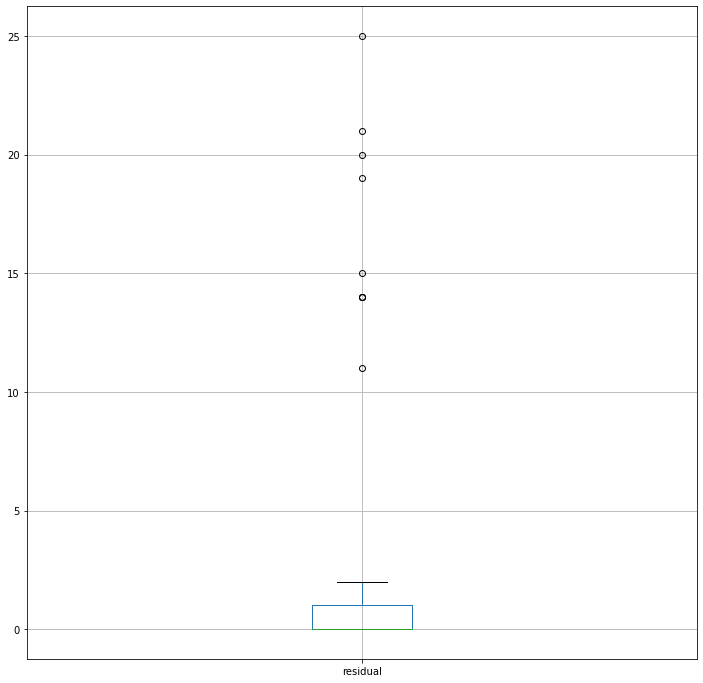

In [119]:
bd = df44.boxplot(column='residual',figsize=(12,12))

In [120]:
Q1 = df44['residual'].quantile(0.25) 
Q3 = df44['residual'].quantile(0.75)
IQR = Q3 - Q1
df_exp = df44[df44['residual'] >= Q3 + 1.5 * IQR]

In [121]:
df_exp['is_expedited_delivery2'] = 0
for l57,l56 in enumerate(df_exp['is_expedited_delivery']):
    if l56 == True:
        df_exp['is_expedited_delivery2'].iloc[l57] = False
    elif l56 == False:
        df_exp['is_expedited_delivery2'].iloc[l57] = True

<ipython-input-121-579ebe7c3be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['is_expedited_delivery2'] = 0
C:\Users\Ro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-121-579ebe7c3be8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['is_expedited_de

In [122]:
dfd_summer2 = df_exp[df_exp['season'] == 'Summer']
dfd_winter2 = df_exp[df_exp['season'] == 'Winter']
dfd_aututum2 = df_exp[df_exp['season'] == 'Autumn']
dfd_Spring2 = df_exp[df_exp['season'] == 'Spring']

In [123]:
dfd_summer2['pre_dcharge2'] = lm_s.predict(dfd_summer2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
dfd_winter2['pre_dcharge2'] = lm_w.predict(dfd_winter2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
dfd_aututum2['pre_dcharge2'] = lm_a.predict(dfd_aututum2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
dfd_Spring2['pre_dcharge2'] = lm_sp.predict(dfd_Spring2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])

<ipython-input-123-944e65ac52f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd_summer2['pre_dcharge2'] = lm_s.predict(dfd_summer2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
<ipython-input-123-944e65ac52f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd_winter2['pre_dcharge2'] = lm_w.predict(dfd_winter2[['distance_to_nearest_warehouse','is_expedited_delivery2','is_happy_customer',]])
<ipython-input-123-944e65ac52f0>:3: SettingWithCopyWarning: 
A value is tr

In [124]:
df444 = pd.concat([dfd_summer2,dfd_winter2,dfd_aututum2,dfd_Spring2])
df444.sort_index(inplace=True)
df_exp = df444

In [125]:
df_exp['residal2'] =0
for y45 in df:
    df_exp['residal2'] = abs(df_exp['pre_dcharge2'] - df_exp['delivery_charges2'])

In [126]:
df_exp2 = df_exp[df_exp['residal2'] < df_exp['residual']]

In [127]:
for b88 in df_exp2.index:
    df.iloc[b88]['is_expedited_delivery'] = df_exp2.loc[b88]['is_expedited_delivery2'] 
    df.iloc[b88]['fixed'] = 1

<ipython-input-127-de92723cc054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[b88]['is_expedited_delivery'] = df_exp2.loc[b88]['is_expedited_delivery2']
<ipython-input-127-de92723cc054>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[b88]['fixed'] = 1


In [128]:
len(df[df['fixed'] == 1])

55

In [129]:
df.drop(['test', 'names', 'fixed','test_analysis','delivery_charges2'],axis=1,inplace=True)

In [130]:
df.to_csv("31339646_dirty_data_solution.csv",index=False)

<div class="alert alert-block alert-info">
    
### Outlier data <a class="anchor" name="test_xml"></a>

For the outlier data we predict the delivery_charges using 'distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer' for each season and use the predicted values to calculate the residual. We then use the residual to plot a box plot to find the outliers and remove them and again plot a boxplot to see if any new outlier come up. We repeat this process for each season till we have no more outliers with respect to delivery_charges. 

In [131]:
df0['pred1'] = 0 #intializing the value of new column pred1

In [132]:
dfs=df0[df0['season'] == 'Summer']
dfw= df0[df0['season'] == 'Winter']
dfsp = df0[df0['season'] == 'Spring']
dfa=df0[df0['season'] == 'Autumn']

We use the models we made for the missing data of each season to predict the delivery_charge for each row of the outlier data. 

In [133]:
dfs['pred1'] = lm_s.predict(df0[df0['season'] == 'Summer'][['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']])
dfw['pred1'] = lm_w.predict(df0[df0['season'] == 'Winter'][['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']])
dfsp['pred1'] = lm_sp.predict(df0[df0['season'] == 'Spring'][['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']])
dfa['pred1'] = lm_a.predict(df0[df0['season'] == 'Autumn'][['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']])

<ipython-input-133-829984a93ea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pred1'] = lm_s.predict(df0[df0['season'] == 'Summer'][['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']])
<ipython-input-133-829984a93ea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['pred1'] = lm_w.predict(df0[df0['season'] == 'Winter'][['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']])
<ipython-input-133-829984a93ea6>:3: SettingWithCopyWarning: 
A value i

In [134]:
df7 = pd.concat([dfs,dfw,dfsp,dfa]) #concatinating the 4 datafromes together

In [135]:
df7.sort_index(inplace=True) #sorting the dataframe

In [136]:
df7['delivery_charges2'] = [cost(df7.iloc[i][6],df7.iloc[i][9]) for i in range(len(df7))] #applying the cost function on each value of the delivery_charges

In [137]:
df7['residual'] =abs(df7['delivery_charges2']- df7['pred1']) #calculating the residual

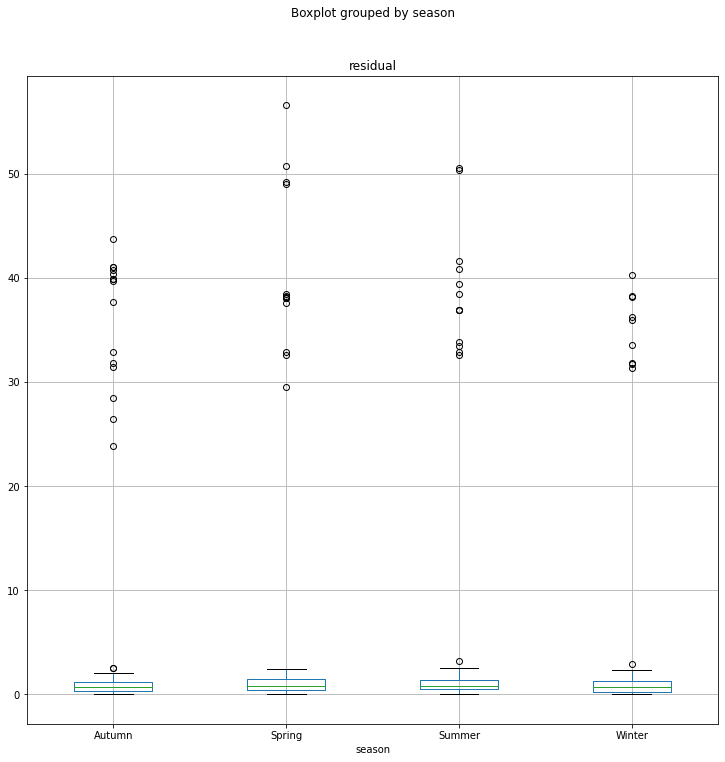

In [138]:
bd = df7.boxplot(column='residual',by='season',figsize=(12,12)) #creating a boxplot for each season

Dividing the data again into the different seasons and saving it as four different dataframes to calculate the quantiles

In [139]:
df7s=df7[df7['season'] == 'Summer']  
df7w=df7[df7['season'] == 'Winter']
df7a=df7[df7['season'] == 'Autumn']
df7sp=df7[df7['season'] == 'Spring']

Calculating the quantile for each season and dropping the outliers of the residual and repeating the process till we get rid of all the outliers amd we plot a boxplot to check

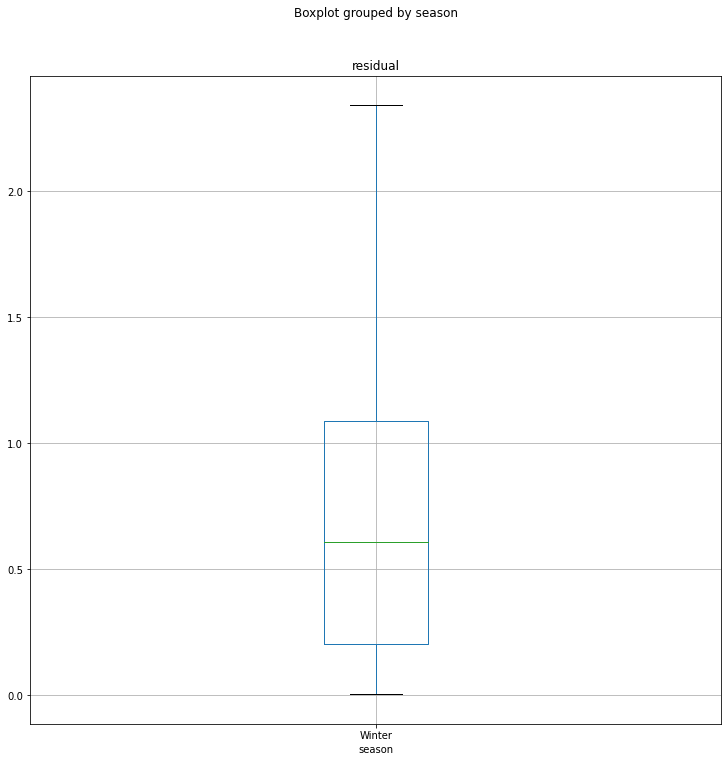

In [140]:
Q1 = df7w['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7w['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1 #calculates the interquartile range (IQR) of the residuals
df7w= df7w.drop(df7w[df7w['residual'] >= Q3 + 1.5 * IQR].index) # drops the outlier rows
bd = df7w.boxplot(column='residual',by='season',figsize=(12,12)) #plots boxplot

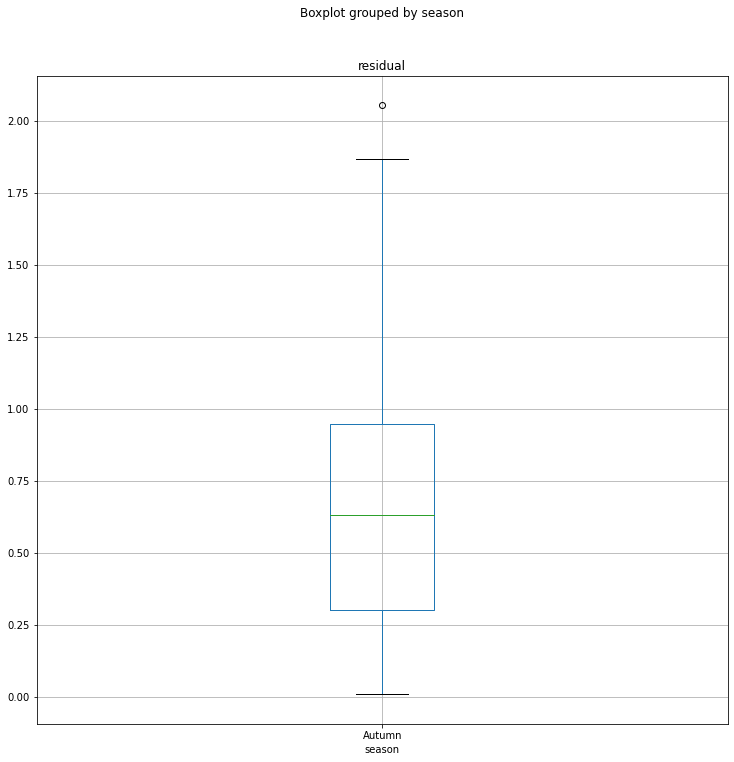

In [141]:
Q1 = df7a['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7a['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1
df7a= df7a.drop(df7a[df7a['residual'] >= Q3 + 1.5 * IQR].index)
bd = df7a.boxplot(column='residual',by='season',figsize=(12,12))

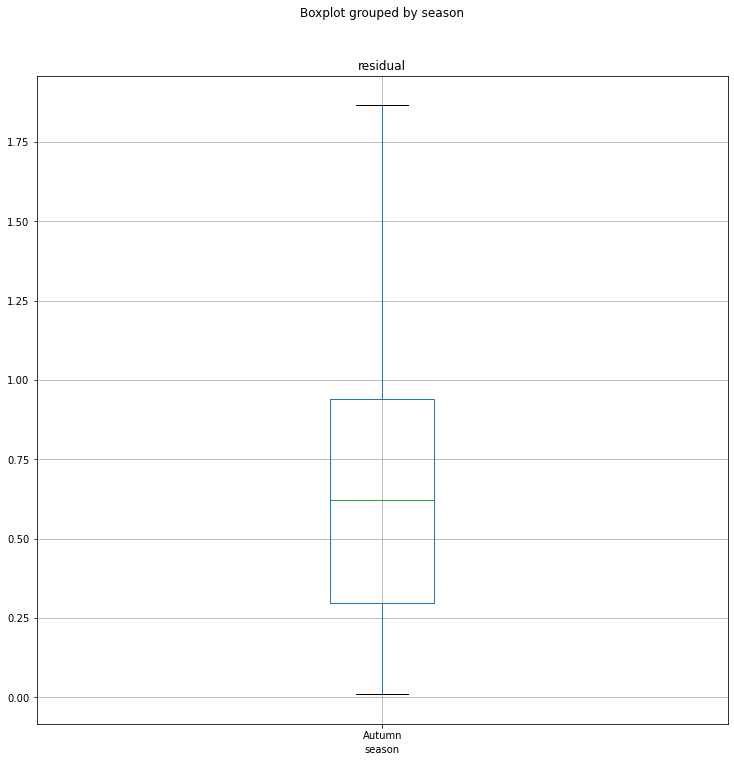

In [142]:
Q1 = df7a['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7a['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1
df7a= df7a.drop(df7a[df7a['residual'] >= Q3 + 1.5 * IQR].index)
bd = df7a.boxplot(column='residual',by='season',figsize=(12,12))

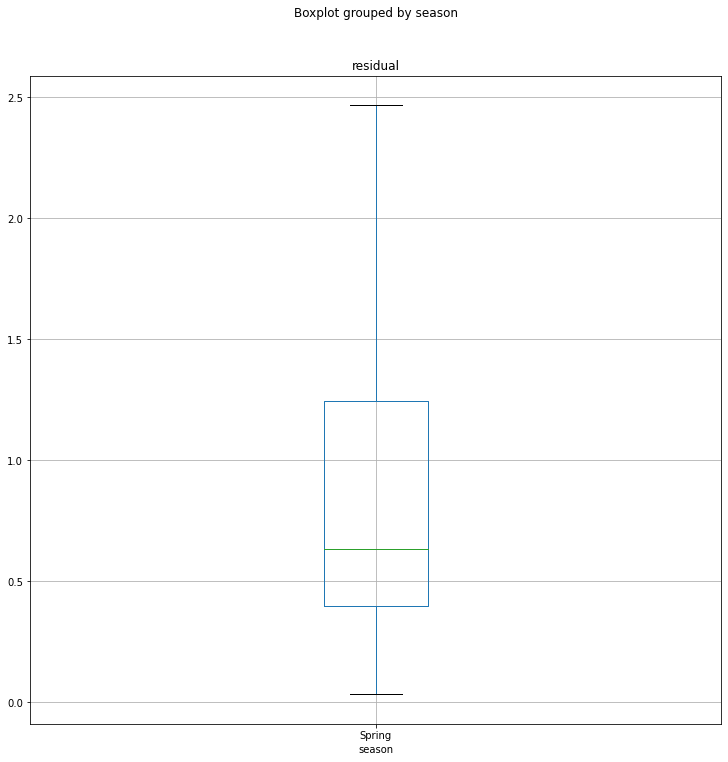

In [143]:
Q1 = df7sp['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7sp['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1
df7sp= df7sp.drop(df7sp[df7sp['residual'] >= Q3 + 1.5 * IQR].index)
bd = df7sp.boxplot(column='residual',by='season',figsize=(12,12))

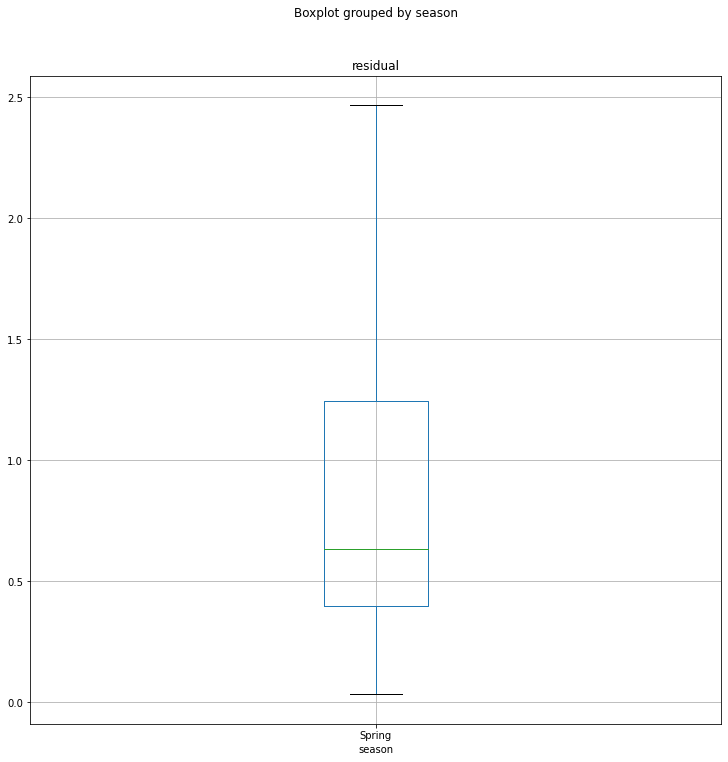

In [144]:
Q1 = df7sp['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7sp['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1
df7sp= df7sp.drop(df7sp[df7sp['residual'] >= Q3 + 1.5 * IQR].index)
bd = df7sp.boxplot(column='residual',by='season',figsize=(12,12))

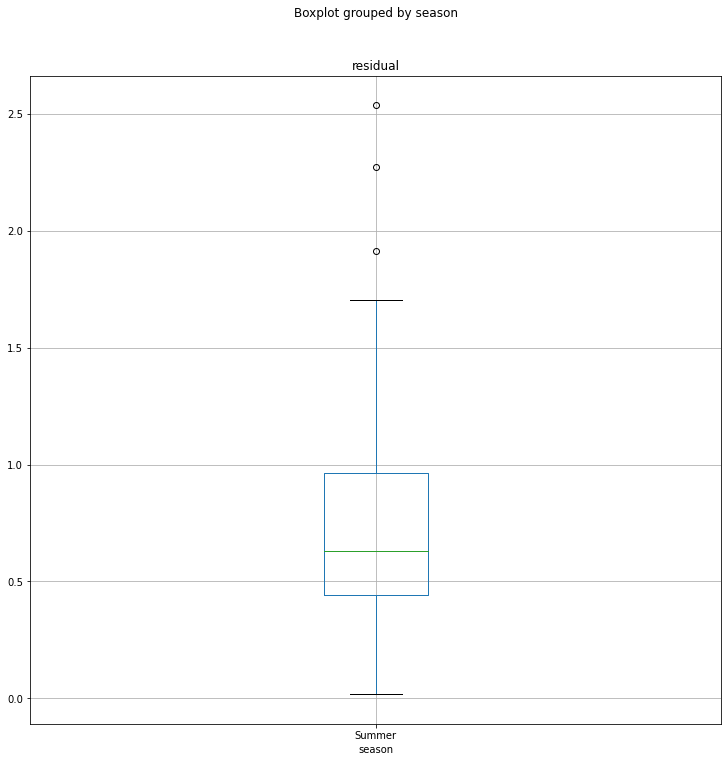

In [145]:
Q1 = df7s['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7s['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1
df7s= df7s.drop(df7s[df7s['residual'] >= Q3 + 1.5 * IQR].index)
bd = df7s.boxplot(column='residual',by='season',figsize=(12,12))

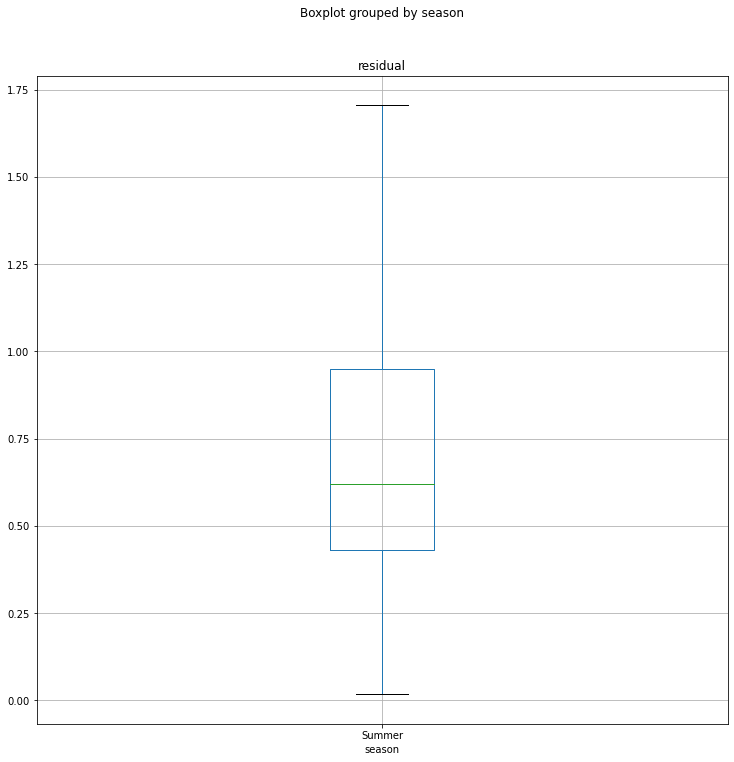

In [146]:
Q1 = df7s['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7s['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1
df7s= df7s.drop(df7s[df7s['residual'] >= Q3 + 1.5 * IQR].index)
bd = df7s.boxplot(column='residual',by='season',figsize=(12,12))

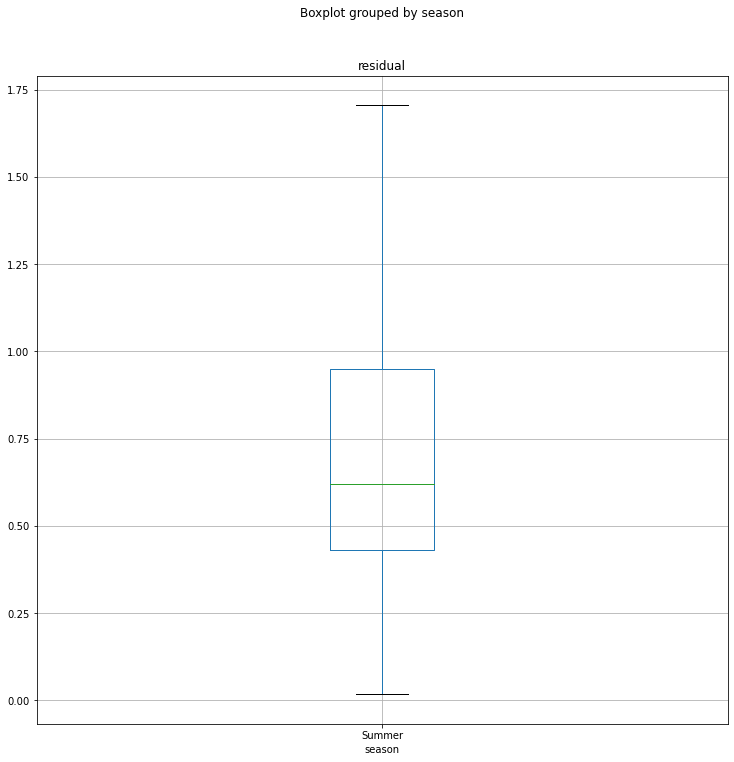

In [147]:
Q1 = df7s['residual'].quantile(0.25) #calculates the first quartile of the residuals
Q3 = df7s['residual'].quantile(0.75) #calculates the third quartile of the residuals
IQR = Q3 - Q1
df7s= df7s.drop(df7s[df7s['residual'] >= Q3 + 1.5 * IQR].index)
bd = df7s.boxplot(column='residual',by='season',figsize=(12,12))

-------------------------------------

In [148]:
df7 = pd.concat([df7s,df7sp,df7a,df7w])
df7.sort_index(inplace=True)

In [149]:
df7.to_csv("31339646_outlier_data_solution.csv",index=False) #wrting the data

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>



[1]<a class="anchor" name="ref-2"></a> https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points/4913653#4913653

....


## --------------------------------------------------------------------------------------------------------------------------